In [1]:
from google.colab import files
files.upload()

Saving QSAR_BCF_Kow.csv to QSAR_BCF_Kow.csv


{'QSAR_BCF_Kow.csv': b'\xef\xbb\xbfCAS,Name,SMILES,LogKOW,KOW type,logBCF\r\n 105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18\r\n 108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03\r\n 113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.4\r\n 114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1\r\n 1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84\r\n 178928-70-6,n.a.,OC(Cc1ccccc1Cl)(CN2N=CNC2=S)C3(CC3)Cl,2.37,pred,1.27\r\n 22259-30-9,n.a.,O=C(Oc1cccc(N=CN(C)C)c1)NC,0.78,pred,0\r\n 2460-49-3,n.a.,Oc1cc(c(cc1(OC))Cl)Cl,3.26,exp,1.98\r\n 25155-30-0,n.a.,O=S(=O)(O)c1ccccc1CCCCCCCCCCCC,4.87,pred,2.02\r\n 57057-83-7,n.a.,Oc1cc(c(c(c1(OC))Cl)Cl)Cl,3.77,exp,2.46\r\n 65-85-0,n.a.,O=C(O)c1ccccc1,1.87,exp,1\r\n 74051-80-2,n.a.,O=C1C(=C(O)CC(C1)CC(C)SCC)C(=NOCC)CCC,4.38,exp,0.93\r\n 74-11-3,n.a.,O=C(O)c1ccc(cc1)Cl,2.65,exp,1\r\n 93-72-1,n.a.,O=C(O)C(Oc1cc(c(cc1Cl)Cl)Cl)C,3.8,exp,1.76\r\n 93-76-5,n.a.,O=C(O)COc1cc(c(cc1Cl)Cl)Cl,3.31,exp,1.38\r\n100-00-5,p-Chloronitrobenzene,O=[N

#Part-1

Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Creating the dataset

In [0]:
dataset=pd.read_csv("QSAR_BCF_Kow.csv")

In [4]:
dataset

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84
...,...,...,...,...,...,...
1053,V-Mey_NA_04,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C,6.46,pred,3.71
1054,V-Mey_NA_05,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C,6.51,pred,3.92
1055,V-Mey_NA_06,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,8.21,pred,3.76
1056,V-Mey_NA_07,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,9.14,pred,3.19


Dropping columns SMILES and KOW 

In [5]:
dataset=dataset.drop(columns=["SMILES","KOW type"],axis=1)
dataset

,CAS,Name,LogKOW,logBCF
0,105-67-9,n.a.,2.3,1.18
1,108-39-4,n.a.,1.96,1.03
2,113136-77-9,n.a.,1.98,-0.40
3,114311-32-9,n.a.,1.02,-1.00
4,1689-84-5,n.a.,2.99,0.84
...,...,...,...,...
1053,V-Mey_NA_04,n.a.,6.46,3.71
1054,V-Mey_NA_05,n.a.,6.51,3.92
1055,V-Mey_NA_06,n.a.,8.21,3.76
1056,V-Mey_NA_07,n.a.,9.14,3.19


Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA  in the column titled “CAS”

In [6]:
dataset[dataset['CAS'].astype(str).str.match("^V-Mey_NA.[a-z0-9A-Z]+")]

,CAS,Name,LogKOW,logBCF
1050,V-Mey_NA_01,n.a.,3.63,1.50
1051,V-Mey_NA_02,n.a.,3.31,2.33
1052,V-Mey_NA_03,n.a.,6.5,2.96
1053,V-Mey_NA_04,n.a.,6.46,3.71
1054,V-Mey_NA_05,n.a.,6.51,3.92
1055,V-Mey_NA_06,n.a.,8.21,3.76
1056,V-Mey_NA_07,n.a.,9.14,3.19
1057,V-Mey_NA_08,n.a.,9.14,2.85


In [0]:
index_CAS=dataset[dataset['CAS'].astype(str).str.match("^V-Mey_NA.[a-z0-9A-Z]+")].index
dataset=dataset.drop(index_CAS)


In [8]:
dataset

,CAS,Name,LogKOW,logBCF
0,105-67-9,n.a.,2.3,1.18
1,108-39-4,n.a.,1.96,1.03
2,113136-77-9,n.a.,1.98,-0.40
3,114311-32-9,n.a.,1.02,-1.00
4,1689-84-5,n.a.,2.99,0.84
...,...,...,...,...
1045,CAE_NA- R-A_NA_01,"p-sec-Butylphenyl-2,3-dihydroxypropylether",2.35,0.63
1046,CAE_NA- R-A_NA_02,"1-Isobutyl 2,5 dimethyl cyclohexane",5.54,3.37
1047,CAE_NA- R-A_NA_03,"1,2,3,4-Tetrabromobenzene",5.14,3.18
1048,CAE_NA- R-A_NA_04,4-Chlorophenylpropargylformal,2.88,2.03


Check for missing values. If available, fill it with zeros, ones and mean of column. 

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAS     1050 non-null   object 
 1   Name    1050 non-null   object 
 2   LogKOW  1048 non-null   object 
 3   logBCF  1048 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.0+ KB


In [0]:
total = dataset['logBCF'].sum(skipna=True)
mean=total/dataset['logBCF'].shape[0]
dataset["logBCF"].fillna(mean, inplace = True)

In [0]:
dataset["LogKOW"].fillna(0, inplace = True)

In [0]:
index_merged=dataset[dataset['LogKOW'].astype(str).str.match("^Merged")].index
dataset=dataset.drop(index_merged)

In [0]:
dataset['LogKOW']=dataset["LogKOW"].astype(float)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAS     1048 non-null   object 
 1   Name    1048 non-null   object 
 2   LogKOW  1048 non-null   float64
 3   logBCF  1048 non-null   float64
dtypes: float64(2), object(2)
memory usage: 40.9+ KB


Remove the column titled “CAS”.

In [15]:
dataset=dataset.drop(columns="CAS",axis=1)
dataset

,Name,LogKOW,logBCF
0,n.a.,2.30,1.18
1,n.a.,1.96,1.03
2,n.a.,1.98,-0.40
3,n.a.,1.02,-1.00
4,n.a.,2.99,0.84
...,...,...,...
1045,"p-sec-Butylphenyl-2,3-dihydroxypropylether",2.35,0.63
1046,"1-Isobutyl 2,5 dimethyl cyclohexane",5.54,3.37
1047,"1,2,3,4-Tetrabromobenzene",5.14,3.18
1048,4-Chlorophenylpropargylformal,2.88,2.03


In [16]:
data=dataset.drop(columns="Name",axis=1)
data

,LogKOW,logBCF
0,2.30,1.18
1,1.96,1.03
2,1.98,-0.40
3,1.02,-1.00
4,2.99,0.84
...,...,...
1045,2.35,0.63
1046,5.54,3.37
1047,5.14,3.18
1048,2.88,2.03


Perform linearity analysis on the resultant dataset. 

No handles with labels found to put in legend.


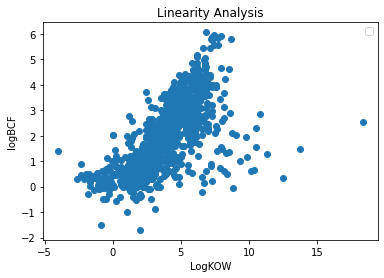

In [17]:
plt.scatter(data["LogKOW"],data["logBCF"])
plt.title("Linearity Analysis")
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

Drawing heatmap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


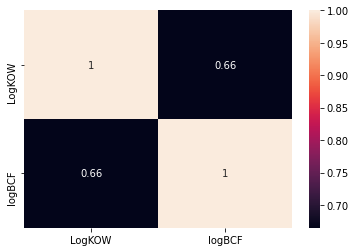

In [18]:
import seaborn as sns
data_corr=data.corr()
sns.heatmap(data_corr,annot=True)

Normalize the values using min-max normalization.

In [19]:
data['LogKOW']=((data['LogKOW']-data['LogKOW'].min())/(data['LogKOW'].max()-data['LogKOW'].min()))
data['logBCF']=((data['logBCF']-data['logBCF'].min())/(data['logBCF'].max()-data['logBCF'].min()))
data.head(20)

,LogKOW,logBCF
0,0.281879,0.371134
1,0.266667,0.351804
2,0.267562,0.167526
3,0.224609,0.090206
4,0.312752,0.327320
5,0.285011,0.382732
6,0.213870,0.219072
7,0.324832,0.474227
8,0.396868,0.479381
9,0.347651,0.536082


Construct a regression equation, y=mx+c with LogKOW as independent attribute(x) and logBCF as dependent attribute(y). 

In [20]:
from sklearn.linear_model import LinearRegression
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.coef_[0]

1.155471144926913

In [22]:
regressor.intercept_

0.0754914295570075

**Plotting regression equation**

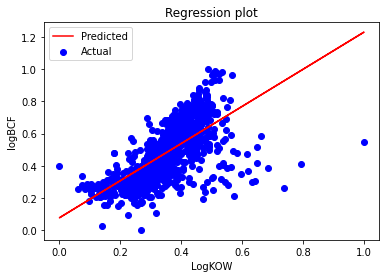

In [23]:
plt.scatter(data.LogKOW, data.logBCF,  color='blue',label="Actual")
plt.plot(X, regressor.coef_[0]*X + regressor.intercept_, '-r',label="Predicted")
plt.title("Regression plot")
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

Identify MAE,MSE and R2 scores. What are you inferring from the scores

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, regressor.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y,regressor.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,regressor.predict(X))))

Mean Absolute Error: 0.09779273507043532
Mean Squared Error: 0.01701920682855145
Root Mean Squared Error: 0.13045768213697287


#Part-2

Repeat Initial steps

In [0]:
dataset=pd.read_csv("QSAR_BCF_Kow.csv")

In [26]:
dataset

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84
...,...,...,...,...,...,...
1053,V-Mey_NA_04,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C,6.46,pred,3.71
1054,V-Mey_NA_05,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C,6.51,pred,3.92
1055,V-Mey_NA_06,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,8.21,pred,3.76
1056,V-Mey_NA_07,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,9.14,pred,3.19


Dropping columns SMILES and KOW 

In [27]:
dataset=dataset.drop(columns=["SMILES","KOW type"],axis=1)
dataset

,CAS,Name,LogKOW,logBCF
0,105-67-9,n.a.,2.3,1.18
1,108-39-4,n.a.,1.96,1.03
2,113136-77-9,n.a.,1.98,-0.40
3,114311-32-9,n.a.,1.02,-1.00
4,1689-84-5,n.a.,2.99,0.84
...,...,...,...,...
1053,V-Mey_NA_04,n.a.,6.46,3.71
1054,V-Mey_NA_05,n.a.,6.51,3.92
1055,V-Mey_NA_06,n.a.,8.21,3.76
1056,V-Mey_NA_07,n.a.,9.14,3.19


Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA  in the column titled “CAS”

In [28]:
dataset[dataset['CAS'].astype(str).str.match("^V-Mey_NA.[a-z0-9A-Z]+")]

,CAS,Name,LogKOW,logBCF
1050,V-Mey_NA_01,n.a.,3.63,1.50
1051,V-Mey_NA_02,n.a.,3.31,2.33
1052,V-Mey_NA_03,n.a.,6.5,2.96
1053,V-Mey_NA_04,n.a.,6.46,3.71
1054,V-Mey_NA_05,n.a.,6.51,3.92
1055,V-Mey_NA_06,n.a.,8.21,3.76
1056,V-Mey_NA_07,n.a.,9.14,3.19
1057,V-Mey_NA_08,n.a.,9.14,2.85


In [0]:
index_CAS=dataset[dataset['CAS'].astype(str).str.match("^V-Mey_NA.[a-z0-9A-Z]+")].index
dataset=dataset.drop(index_CAS)


In [30]:
dataset

,CAS,Name,LogKOW,logBCF
0,105-67-9,n.a.,2.3,1.18
1,108-39-4,n.a.,1.96,1.03
2,113136-77-9,n.a.,1.98,-0.40
3,114311-32-9,n.a.,1.02,-1.00
4,1689-84-5,n.a.,2.99,0.84
...,...,...,...,...
1045,CAE_NA- R-A_NA_01,"p-sec-Butylphenyl-2,3-dihydroxypropylether",2.35,0.63
1046,CAE_NA- R-A_NA_02,"1-Isobutyl 2,5 dimethyl cyclohexane",5.54,3.37
1047,CAE_NA- R-A_NA_03,"1,2,3,4-Tetrabromobenzene",5.14,3.18
1048,CAE_NA- R-A_NA_04,4-Chlorophenylpropargylformal,2.88,2.03


Check for missing values. If available, fill it with zeros, ones and mean of column. 

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAS     1050 non-null   object 
 1   Name    1050 non-null   object 
 2   LogKOW  1048 non-null   object 
 3   logBCF  1048 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.0+ KB


In [0]:
total = dataset['logBCF'].sum(skipna=True)
mean=total/dataset['logBCF'].shape[0]
dataset["logBCF"].fillna(mean, inplace = True)

In [0]:
dataset["LogKOW"].fillna(0, inplace = True)

In [0]:
index_merged=dataset[dataset['LogKOW'].astype(str).str.match("^Merged")].index
dataset=dataset.drop(index_merged)

In [0]:
dataset['LogKOW']=dataset["LogKOW"].astype(float)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAS     1048 non-null   object 
 1   Name    1048 non-null   object 
 2   LogKOW  1048 non-null   float64
 3   logBCF  1048 non-null   float64
dtypes: float64(2), object(2)
memory usage: 40.9+ KB


Remove the column titled “CAS”.

In [37]:
dataset=dataset.drop(columns="CAS",axis=1)
dataset

,Name,LogKOW,logBCF
0,n.a.,2.30,1.18
1,n.a.,1.96,1.03
2,n.a.,1.98,-0.40
3,n.a.,1.02,-1.00
4,n.a.,2.99,0.84
...,...,...,...
1045,"p-sec-Butylphenyl-2,3-dihydroxypropylether",2.35,0.63
1046,"1-Isobutyl 2,5 dimethyl cyclohexane",5.54,3.37
1047,"1,2,3,4-Tetrabromobenzene",5.14,3.18
1048,4-Chlorophenylpropargylformal,2.88,2.03


In [38]:
data=dataset.drop(columns="Name",axis=1)
data

,LogKOW,logBCF
0,2.30,1.18
1,1.96,1.03
2,1.98,-0.40
3,1.02,-1.00
4,2.99,0.84
...,...,...
1045,2.35,0.63
1046,5.54,3.37
1047,5.14,3.18
1048,2.88,2.03


Perform linearity analysis on the resultant dataset. 

No handles with labels found to put in legend.


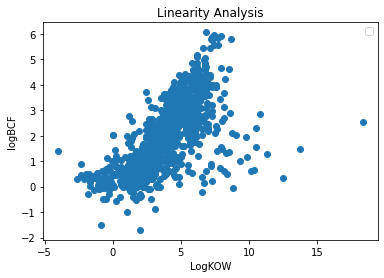

In [39]:
plt.scatter(data["LogKOW"],data["logBCF"])
plt.title("Linearity Analysis")
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

Drawing heatmap

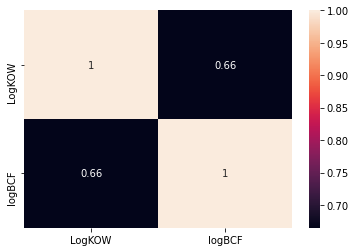

In [40]:
import seaborn as sns
data_corr=data.corr()
sns.heatmap(data_corr,annot=True)

Normalize the values using min-max normalization.

In [41]:
data['LogKOW']=((data['LogKOW']-data['LogKOW'].min())/(data['LogKOW'].max()-data['LogKOW'].min()))
data['logBCF']=((data['logBCF']-data['logBCF'].min())/(data['logBCF'].max()-data['logBCF'].min()))
data.head(20)

,LogKOW,logBCF
0,0.281879,0.371134
1,0.266667,0.351804
2,0.267562,0.167526
3,0.224609,0.090206
4,0.312752,0.327320
5,0.285011,0.382732
6,0.213870,0.219072
7,0.324832,0.474227
8,0.396868,0.479381
9,0.347651,0.536082


 Divide the dataset into having 750 and 308 rows.(It is a 70:30 ratio) Randomization may be applied

In [0]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Predict the value of y, dependent value using the calculated m and c values and store in predicted_y.Compare the difference between actual_y and predicted_y.

In [44]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
regressor.predict(X_test)

array([0.45317679, 0.45047414, 0.39588058, 0.35588133, 0.46723058,
       0.49209498, 0.54344536, 0.38290785, 0.20237071, 0.74830636,
       1.01694993, 0.34723285, 0.35317868, 0.66290256, 0.52236467,
       0.4337177 , 0.30236883, 0.36615141, 0.59641733, 0.44723096,
       0.34182754, 0.58290407, 0.40128588, 0.40398853, 0.53858058,
       0.35696239, 0.3304764 , 0.17642526, 0.55371543, 0.51641884,
       0.46993323, 0.48777073, 0.43155558, 0.48344649, 0.16885783,
       0.3499355 , 0.39371845, 0.38939421, 0.60939006, 0.46885217,
       0.38182679, 0.40128588, 0.33534118, 0.32344951, 0.37642148,
       0.55047225, 0.43642035, 0.62182226, 0.40290747, 0.50722983,
       0.52128361, 0.56722869, 0.608309  , 0.6385787 , 0.53804005,
       0.31858474, 0.60506582, 0.51695937, 0.43047452, 0.48993285,
       0.48777073, 0.45966316, 0.66992946, 0.62776809, 0.37588095,
       0.60939006, 0.63965976, 0.39912376, 0.40723171, 0.40398853,
       0.71641507, 0.39858323, 0.51155407, 0.39966429, 0.64128

In [46]:
y_test

array([0.48582474, 0.21907216, 0.23324742, 0.26030928, 0.47551546,
       0.53865979, 0.68814433, 0.18041237, 0.20231959, 0.49097938,
       0.40979381, 0.23324742, 0.27706186, 0.77448454, 0.30798969,
       0.3621134 , 0.16881443, 0.2757732 , 0.56701031, 0.40463918,
       0.19845361, 0.66752577, 0.38917526, 0.32989691, 0.68041237,
       0.25773196, 0.22551546, 0.18041237, 0.67010309, 0.27706186,
       0.45360825, 0.46262887, 0.56056701, 0.45876289, 0.28350515,
       0.31314433, 0.21907216, 0.40335052, 0.84407216, 0.59407216,
       0.31056701, 0.31185567, 0.22809278, 0.25257732, 0.26159794,
       0.62113402, 0.39948454, 0.66752577, 0.33634021, 0.47036082,
       0.67268041, 0.5128866 , 0.61984536, 0.54381443, 0.56958763,
       0.29896907, 0.72809278, 0.57087629, 0.42139175, 0.55927835,
       0.45747423, 0.45876289, 0.97680412, 0.69458763, 0.34793814,
       0.7757732 , 0.67912371, 0.38659794, 0.50515464, 0.35695876,
       0.56443299, 0.39561856, 0.51030928, 0.32474227, 0.57087

**Plotting the regression equation**

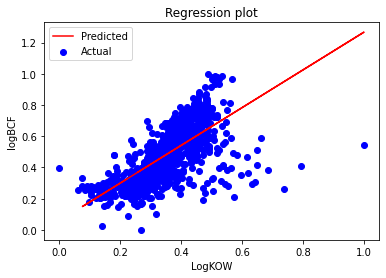

In [48]:
plt.scatter(data.LogKOW, data.logBCF,  color='blue',label="Actual")
plt.plot(X_train, regressor.coef_[0]*X_train + regressor.intercept_, '-r',label="Predicted")
plt.title("Regression plot")
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

 Calculate MAE, MSE and r2. What do you infer from the scores?

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, regressor.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y,regressor.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,regressor.predict(X))))

Mean Absolute Error: 0.09685200614831192
Mean Squared Error: 0.017049511744675366
Root Mean Squared Error: 0.13057377893235445


From the above observations , we can see that the metrics value from the above model are almost the same as the previous model .But we can infer the following from the above observations :


1.   MAE has decreased in the second model
2.   MSE has increased in the second model
3. RMSE has increased in the second model



#Part-3

Perform cross – validation with 2, 3, 4 and till 14 folds with r2 as the metric

In [54]:
from sklearn.model_selection import cross_val_score
vali=[2,3,4,14]
for i in vali:
  accuracy=cross_val_score(regressor,X,y,cv=i,scoring="r2")
  print("Number of folds:",i," Accuracy:",accuracy)


Number of folds: 2  Accuracy: [0.2940963 0.4917453]
Number of folds: 3  Accuracy: [0.32144317 0.36214809 0.49132267]
Number of folds: 4  Accuracy: [0.12568676 0.34361067 0.48940036 0.45578078]
Number of folds: 14  Accuracy: [ 0.36618316  0.13322445  0.12582733  0.43519506  0.45626569 -0.04868227
  0.29745624  0.3611614   0.52179573  0.5955038   0.54876981  0.45026282
  0.49504824  0.32313235]


The above metric values show that the model is not a very good fit for the data , to give a better fit we must do further analysis.
Some steps that can be taken to make a better fitting model:


*   Removing the outliers
*   Using a different model , or ensmbling the models to get more accuracy
*  Normalising the data before predicting the values